In [1]:
import pandas as pd
data=pd.read_csv('C:\\Users\\user\\Desktop\\빅데이터분석기사\\BigData_data_최종본(1022)\\Ex_CEOSalary.csv')
#데이터 특성 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.7 KB


In [2]:
data.head()

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199219,13.8,1


In [3]:
data['industry'].value_counts()

1    72
3    60
2    46
4    31
Name: industry, dtype: int64

In [4]:
data['industry']=data['industry'].replace([1,2,3,4],['Service','IT','Finance','Others'])
data['industry'].value_counts()

Service    72
Finance    60
IT         46
Others     31
Name: industry, dtype: int64

<AxesSubplot: ylabel='industry'>

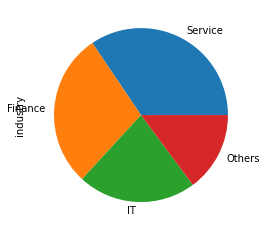

In [6]:
data['industry'].value_counts().plot(kind='pie')

<AxesSubplot: >

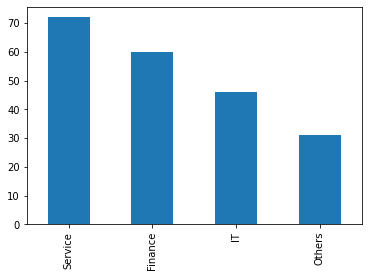

In [7]:
data['industry'].value_counts().plot(kind='bar')

In [9]:
#숫자형 자료는 describe() 이용
data.describe()
#평균과 중위수가 일치할수록 이상치가 적은 데이터

,salary,sales,roe
count,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211
std,1372.345308,10633.271088,8.518509
min,223.000000,175.199997,0.500000
25%,736.000000,2210.300049,12.400000
50%,1039.000000,3705.199951,15.500000
75%,1407.000000,7177.000000,20.000000
max,14822.000000,97649.898438,56.299999


In [10]:
#2보다 크면 한쪽으로 쏠려있다
data.skew()

C:\Users\user\AppData\Local\Temp\ipykernel_15680\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64

In [11]:
#클수록 중심에 있다
data.kurtosis()

C:\Users\user\AppData\Local\Temp\ipykernel_15680\2361870383.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurtosis()


salary    58.971229
sales     33.115193
roe        3.797366
dtype: float64

array([[<AxesSubplot: title={'center': 'salary'}>,
        <AxesSubplot: title={'center': 'sales'}>],
       [<AxesSubplot: title={'center': 'roe'}>, <AxesSubplot: >]],
      dtype=object)

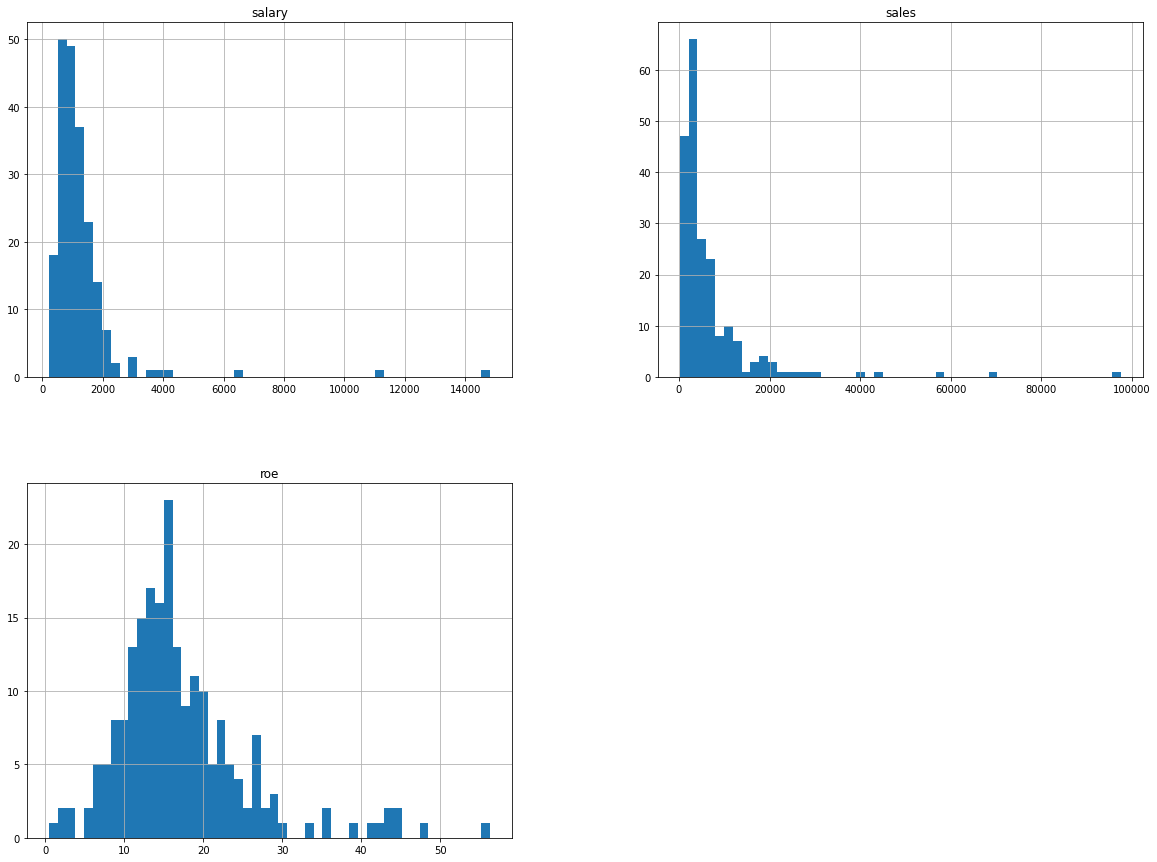

In [12]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))

In [13]:
#상관계수 파악, 디폴트=pearson
data.corr()

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [14]:
#method= pearson,spearman, kendall
data.corr(method='spearman')

,salary,sales,roe
salary,1.000000,0.528016,0.205984
sales,0.528016,1.000000,-0.170548
roe,0.205984,-0.170548,1.000000


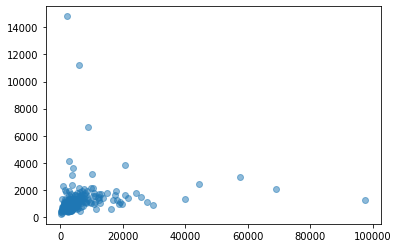

In [15]:
plt.scatter(data['sales'],data['salary'],alpha=0.5)
plt.show()

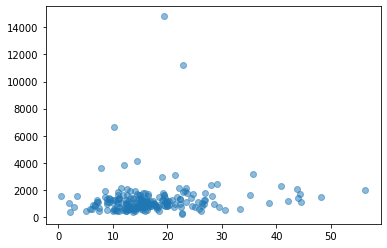

In [16]:
plt.scatter(data['roe'],data['salary'],alpha=0.5)
plt.show()

In [17]:
data.groupby('industry')[['salary']].describe()

salary                                                            \
          count         mean          std    min     25%     50%      75%   
industry                                                                    
Finance    60.0  1722.416667  2242.687041  223.0  911.00  1246.0  1643.75   
IT         46.0  1344.913043  1002.813128  441.0  884.00  1119.5  1406.00   
Others     31.0   627.870968   175.264323  333.0  501.50   607.0   726.00   
Service    72.0  1153.875000   563.472032  256.0  811.25  1064.0  1348.50   

                   
              max  
industry           
Finance   14822.0  
IT         6640.0  
Others     1100.0  
Service    3844.0

BP(ax=<AxesSubplot: >, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x0000022254EBBA30>, <matplotlib.lines.Line2D object at 0x0000022254EBBD30>], 'caps': [<matplotlib.lines.Line2D object at 0x0000022254EBBB50>, <matplotlib.lines.Line2D object at 0x0000022254F217F0>], 'boxes': [<matplotlib.lines.Line2D object at 0x00000222554CB580>], 'medians': [<matplotlib.lines.Line2D object at 0x0000022254F216D0>], 'fliers': [<matplotlib.lines.Line2D object at 0x0000022254F21BB0>], 'means': []})

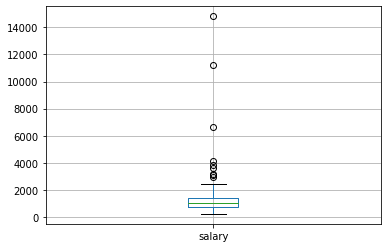

In [18]:
data.boxplot(column='salary',return_type='both')

In [19]:
Q1_salary=data['salary'].quantile(q=0.25)
Q3_salary=data['salary'].quantile(q=0.75)
IQR_salary=Q3_salary-Q1_salary
IQR_salary

671.0

<AxesSubplot: >

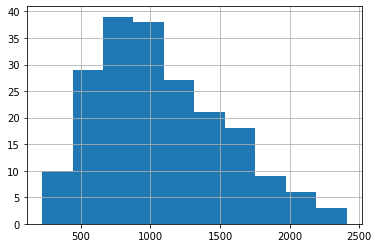

In [21]:
data_IQR=data[(data['salary']<Q3_salary+IQR_salary*1.5)&(data['salary']>Q1_salary-IQR_salary*1.5)]
data_IQR['salary'].hist()

In [22]:
data_IQR.corr()
#이상치 제거한 결과 상관계수 높아짐

,salary,sales,roe
salary,1.000000,0.335446,0.289704
sales,0.335446,1.000000,-0.065034
roe,0.289704,-0.065034,1.000000
